In [1]:
#@title Import Libraries

import matplotlib.pyplot as plt
import os
import warnings
import numpy as np
import ipywidgets as widgets

from google.colab import drive
drive.mount('/content/drive',
           force_remount = True)

%cd /content/drive/My Drive/Physics Research/CMS/Analysis/TTTT TMVA DNN/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Physics Research/CMS/Analysis/TTTT TMVA DNN


In [2]:
#@title Choose a set of results to display
file_list = next(os.walk(os.getcwd()))[1]

print("Choose a set of results to display:")
file_names = widgets.Dropdown(options=file_list)
file_names

Choose a set of results to display:


Dropdown(options=('4j_Mar12', '6j_Mar13', '0j_Mar2', '2j_Mar14', '0j_Mar15', '0j_0b_Mar17'), value='4j_Mar12')

In [0]:
#@title Extract importance values from file and sort
#@markdown Upload the "VariableImportanceResults_#vars_opt#.txt" file onto your
#@markdown directory from which you are running this script. You can do this by
#@markdown `scp <LPC Username>@cmslpc-sl7.fnal.gov://path/to/.txt/file .` and 
#@markdown then import the file.

results_dir = os.listdir(os.getcwd() + "/" + file_names.value)
ROC_name = [name for name in results_dir if "ROC" in name]
nVars = int(ROC_name[0].split("vars")[0].split("ROC_hists_")[1])
file_path = file_names.value

value_list0 = []
value_list1 = []
rms_list1 = []
variable_list0 = []
variable_list1 = []
frequency_list = []
normalization_0 = 0
normalization_1 = 0

start_reading = False   # don't edit

with open(file_path + "/VariableImportanceResults_" + str(nVars) + "vars_opt0.txt") as file:
  for line in file.readlines():
    if start_reading == True:
      content = line.split("/")
      frequency_list.append(float(content[1].strip()))
      variable_list0.append(content[0].split(".")[1].strip())
      value_list0.append(float(content[2].strip()))
    if "Variable Name" in line: start_reading = True
    if "Normalization" in line: 
      normalization_0 = float(line.split(":")[1])

start_reading = False   # don't edit

with open(file_path + "/VariableImportanceResults_" + str(nVars) + "vars_opt1.txt") as file:
  for line in file.readlines():
    if start_reading == True:
      content = line.split("/")
      variable_list1.append(content[0].split(".")[1].strip())
      value_list1.append(float(content[2].strip()))
      rms_list1.append(float(content[3].strip()))
    if "Variable Name" in line: start_reading = True
    if "Normalization" in line: 
      normalization_1 = float(line.split(":")[1])

value_list_sort0, variable_list_sort0 = zip(*sorted(zip(
    value_list0,variable_list0
    )))

value_list_sort1, rms_list_sort1, variable_list_sort1 = zip(*sorted(zip(
    value_list1,rms_list1,variable_list1
    )))

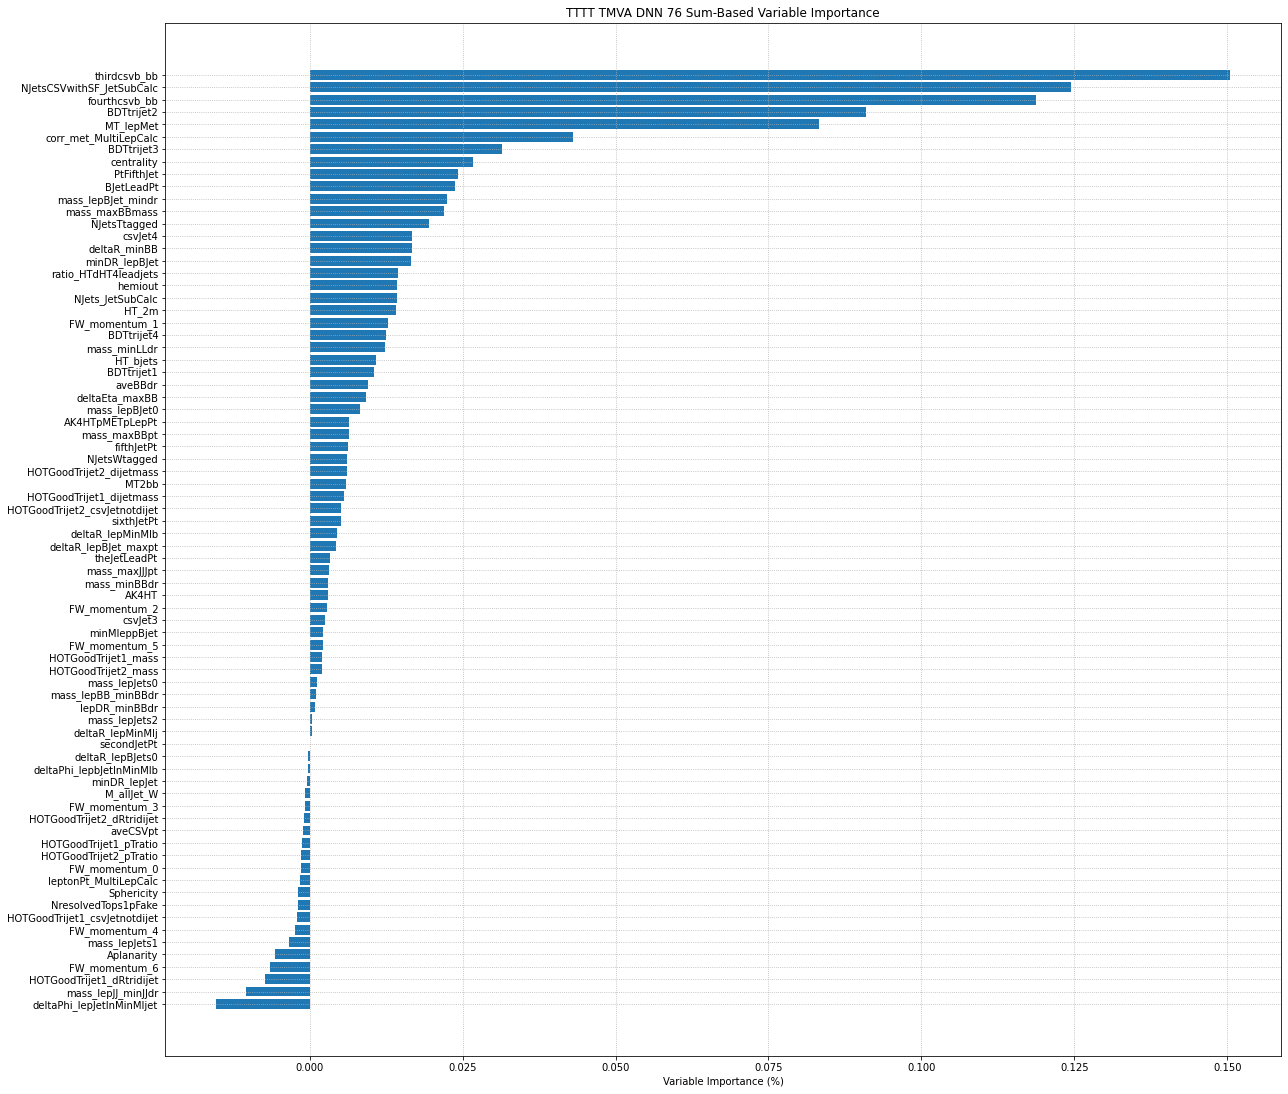

In [4]:
#@title Plot the traditional variable importance (option 0)
plt.close()
plt.figure(figsize=(20,int(nVars/4)))
plt.barh(variable_list_sort0,value_list_sort0)
plt.title('TTTT TMVA DNN ' + str(nVars) + ' Sum-Based Variable Importance')
plt.grid(which = 'both',linestyle = ':')
plt.xlabel('Variable Importance (%)')
plt.savefig(file_path + \
            "VariableImportanceResults_" + str(nVars) + "vars_opt0.png")
plt.show()

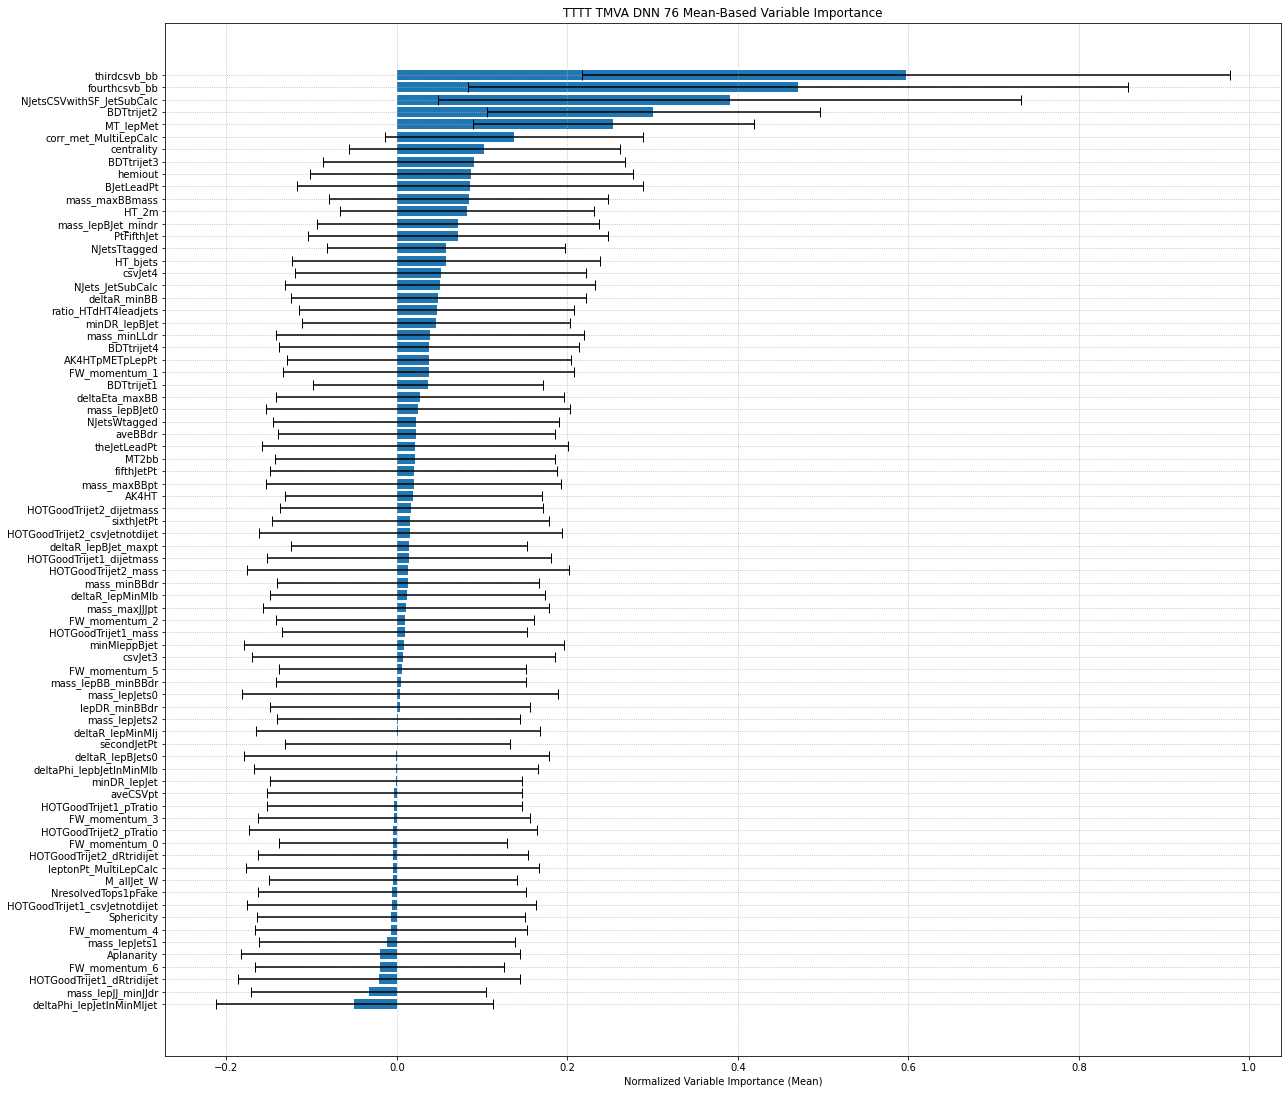

In [5]:
#@title Plot the mean-based variable importance (option 1)
plt.close()
plt.figure(figsize=(20,int(nVars/4)))
plt.barh(variable_list_sort1,value_list_sort1,xerr=rms_list_sort1,
         align='center',capsize=5.0)
plt.title('TTTT TMVA DNN ' + str(nVars) + ' Mean-Based Variable Importance')
plt.grid(which = 'both',linestyle = ':')
plt.xlabel('Normalized Variable Importance (Mean)')
plt.savefig(file_path + \
            "VariableImportanceResults_" + str(nVars) + "vars_opt1.png")
plt.show()

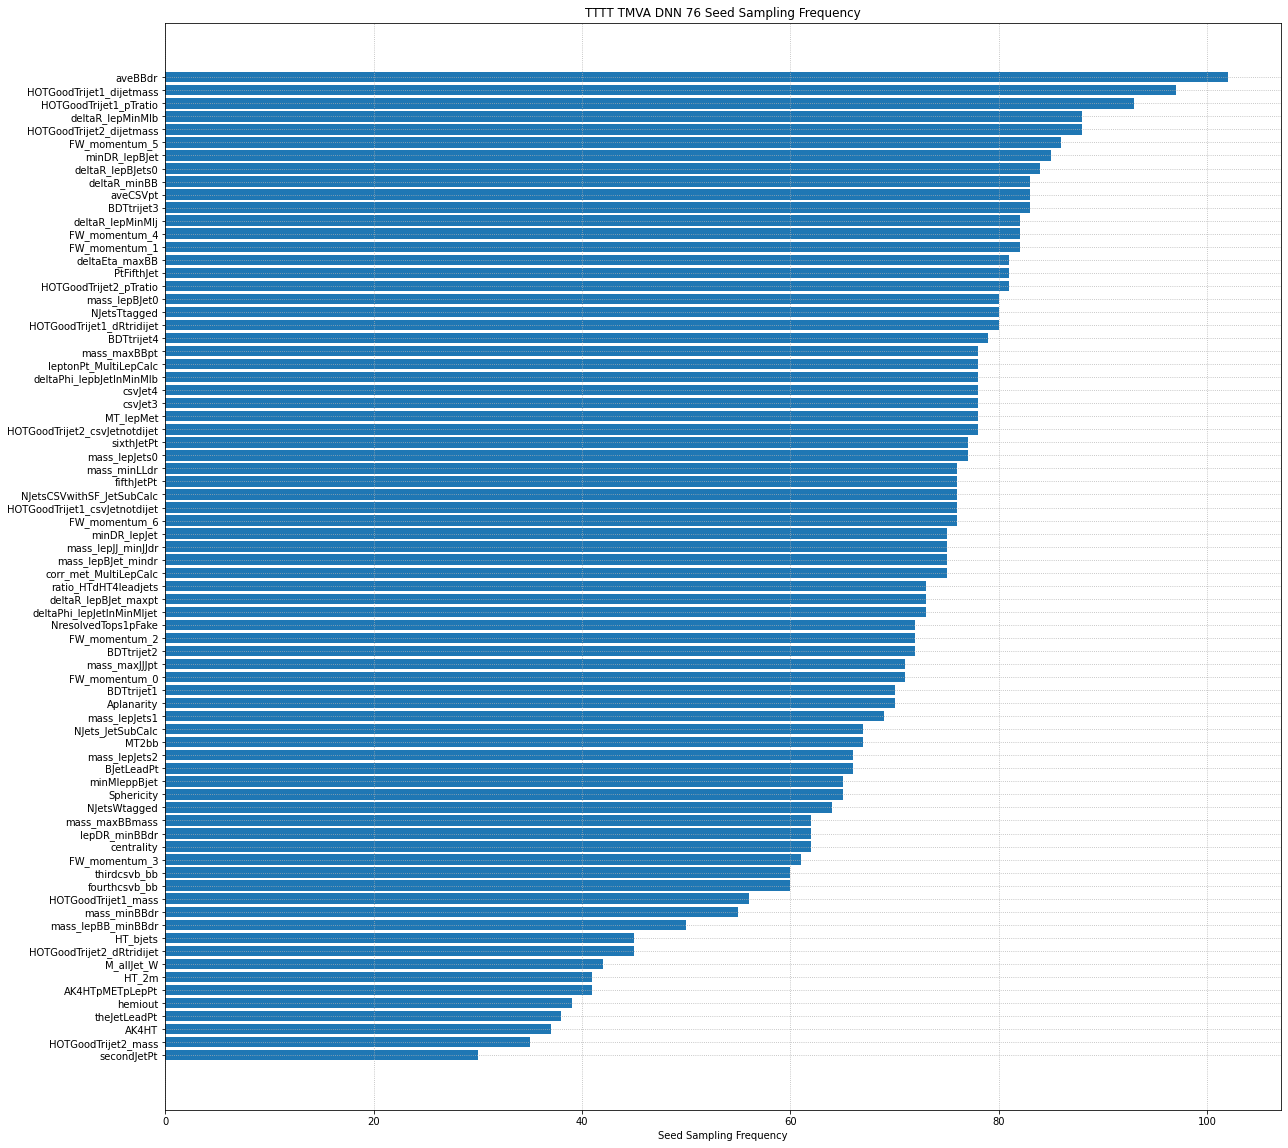

In [6]:
#@title Plot the sampling frequency of each variable
frequency_list_sort, variable_list_sort = zip(*sorted(zip(
    frequency_list,variable_list1
    )))

plt.close()
plt.figure(figsize=(20,20))
plt.barh(variable_list_sort,frequency_list_sort)
plt.title('TTTT TMVA DNN ' + str(nVars) + ' Seed Sampling Frequency')
plt.grid(which = 'both',linestyle = ':')
plt.xlabel('Seed Sampling Frequency')
plt.savefig(file_path + \
            "VariableImportanceSamplingFrequency_" + str(nVars) + "vars" + \
            ".png")
plt.show()

## Plot ROC distributions

In [7]:
#@title Load the ROC differentials
importance_dict = np.load(file_path + "/ROC_hists_" + str(nVars) + "vars.npy",
                          allow_pickle=True).item()
importance_keys = list(importance_dict.keys())
print("Choose a variable to view:")
key_names = widgets.Dropdown(options=importance_keys)
key_names

Choose a variable to view:


Dropdown(options=('HOTGoodTrijet1_dijetmass', 'Aplanarity', 'deltaR_lepBJet_maxpt', 'csvJet3', 'csvJet4', 'NJe…

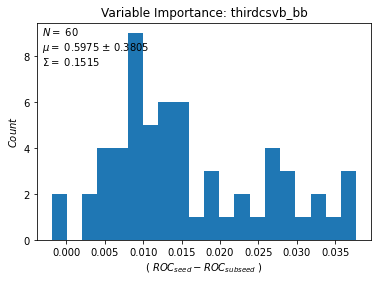

In [9]:
#@title Plot the distribution specified
key = key_names.value

plt.close()
plt.figure()
plt.title("Variable Importance: {}".format(key))
plt.annotate(u"$N=$ {}".format(
    len(importance_dict[key])),
    xycoords = "axes pixels",
    xy = (5,205)
)
plt.annotate(u"$\mu=$ {:.4f} \u00B1 {:.4f}".format(
    np.mean(importance_dict[key])*normalization_1,
    np.std(importance_dict[key])*normalization_1),
    xycoords = "axes pixels",
    xy = (5,190)
)
plt.annotate(u"$\Sigma=$ {:.4f}".format(
    np.sum(importance_dict[key])*normalization_0),
    xycoords = "axes pixels",
    xy = (5,175)
)
plt.xlabel(r"( $ROC_{seed}-ROC_{subseed}$ )")
plt.ylabel(r"$Count$")
importance_dict[key] = np.array(importance_dict[key])
plt.hist(importance_dict[key],bins=20)
plt.show()